# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import *
%matplotlib inline

from IPython import display
import time

from environments.evil_wgw_env import EvilWindyGridWorld
from tabular_methods import QTable

# Tabular methods (provably converge)

In [2]:
env = EvilWindyGridWorld(grid_size=(7, 10), visual=True, stochasticity=0.05)
num_actions = 4

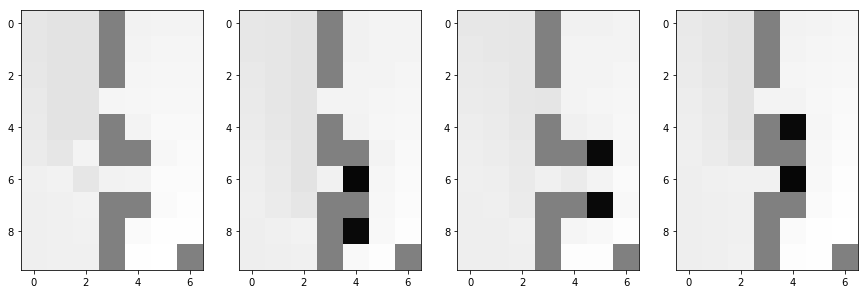

In [3]:
qt = QTable(env)
qt.run_policy_iteration(pol_eval_times=1, tol=1e-3)
qt.plot_q_values()

In [4]:
qt.update_policy()

(1, 14)

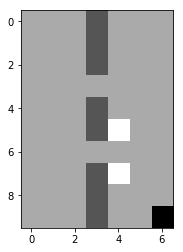

In [5]:
env.play_with_policy(qt.pi)

# Training visualization

#### Average UNDISCOUNTED return

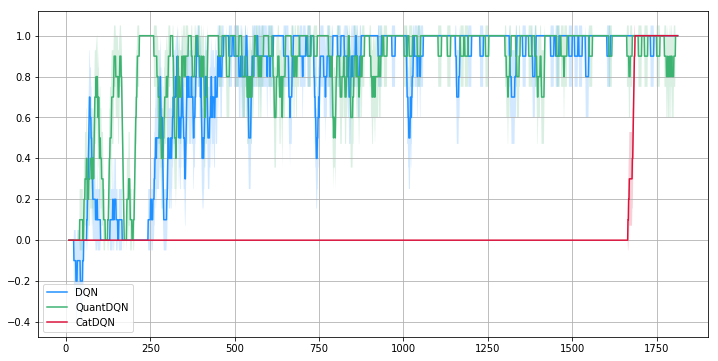

In [6]:
path = "evil_wgw_models/test/exp0_1/model/learning_curve.npz"
test = np.load(path)["test"]
quant, dqn, cat = test[0, :], test[1, :], test[2, :]
plot_two_lines(
    np.arange(len(dqn)),
    ys=[dqn, quant, cat],
    labels=["DQN", "QuantDQN", "CatDQN"],
    colors=["dodgerblue", "mediumseagreen", "crimson"],
    tau=10
)

#### Average number of steps in the episode

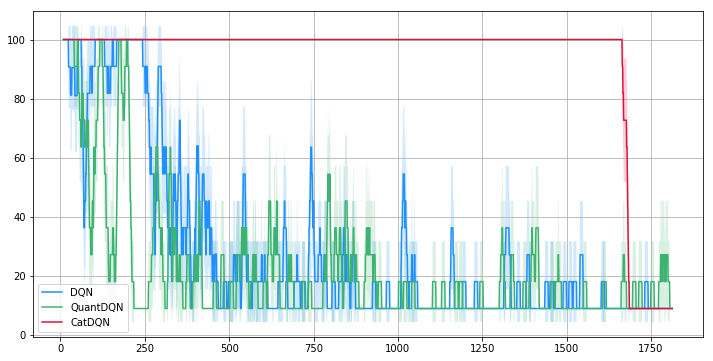

In [7]:
path = "evil_wgw_models/test/exp0_1/model/learning_curve.npz"
test = np.load(path)["test_num_steps"]
quant, dqn, cat = test[0, :], test[1, :], test[2, :]
plot_two_lines(
    np.arange(len(dqn)),
    ys=[dqn, quant, cat],
    labels=["DQN", "QuantDQN", "CatDQN"],
    colors=["dodgerblue", "mediumseagreen", "crimson"],
    tau=10
)

In [8]:
q = np.load(path)["q_vals"]
q_dqn, q_quant, q_cat = q[0, -1], q[1, -1], q[2, -1]

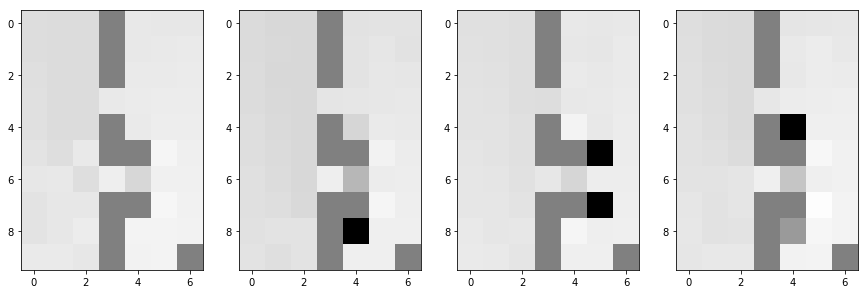

In [9]:
plot_q_values(env, q_dqn)

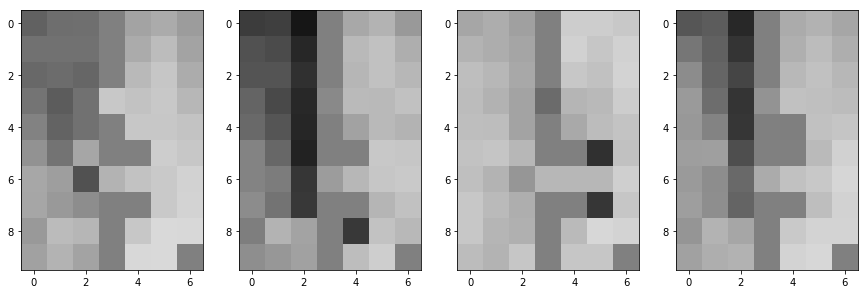

In [10]:
plot_q_values(env, q_quant)

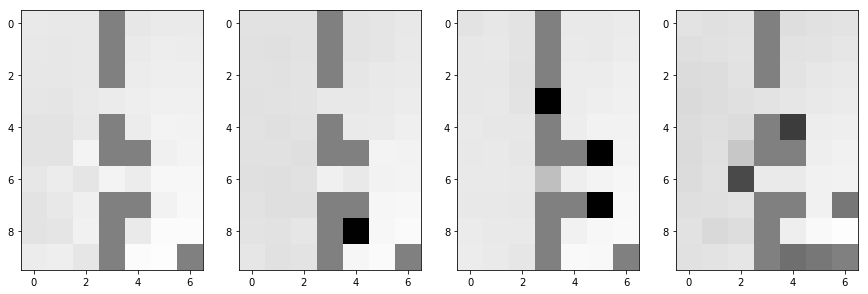

In [11]:
plot_q_values(env, q_cat)